# Chapter 3: Rigid-Body Motions

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import modern_robotics as mr

$\DeclareMathOperator{\tr}{tr}$

Notes on coordinate frames used in course
- All frames are stationary, inertial frames.
- All frames are right-handed (follow right-hand rule with x axis along pointer finger, y axis along middle finger, and z axis along thumb; $\hat{x} \times \hat{y} = \hat{z}$)

## Rigid-Body Motions in a Plane

![Figure 3.3](images/fig3.3.png)

$$
\begin{align*}
    p &= p_x\hat{x_s} + p_y\hat{y_s} \\
    \hat{x_b} &= \cos{\theta}\hat{x_s} + \sin{\theta}\hat{y_s} \\ 
    \hat{y_b} &= -\sin{\theta}\hat{x_s} + \cos{\theta}\hat{y_s} \\
    p &=
    \begin{bmatrix}
        p_x \\
        p_y
    \end{bmatrix} &\text{position of b relative to s} \\
    R_{sb} &=
    \begin{bmatrix}
        \hat{x_b} & \hat{y_b}
    \end{bmatrix}
    =
    \begin{bmatrix}
        \cos{\theta} & -\sin{\theta} \\
        \sin{\theta} & \cos{\theta}
    \end{bmatrix} &\text{orientation of b relative to s}
\end{align*}
$$

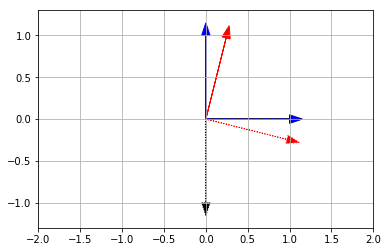

In [54]:
'''
Using a rotation matrix to rotate a vector in 2D
'''
ax = plt.axes()
ax.axis('equal')

def plot2DFrame(origin, frame, colors=['k', 'b'], linestyle='-'):
    for col in range(frame.shape[1]):
        ax.arrow(*origin, *frame[:, col], head_width=.1, color=colors[col],
                linestyle=linestyle)
        
def plot2DVector(origin, vector, color='k', linestyle='-'):
    ax.arrow(*origin, *vector[:, 0], head_width=.1, color=color,
             linestyle=linestyle)
    
# initial frame
origin = np.array([0, 0])
F = np.array([[1, 0],
              [0, 1]])

# rotation matrix (new frame)
R = np.array([[0, 1],
              [-1, 0]])

# vector
v = np.array([[1],
              [4]])
v = v / np.linalg.norm(v)
r = np.dot(R, v)

plot2DFrame(origin, F)
plot2DVector(origin, v, color='r')
plot2DFrame(origin, R, linestyle=':')
plot2DVector(origin, r, color='r', linestyle=':')
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

### Screw Motion Theory
- https://en.wikipedia.org/wiki/Screw_theory

![Figure 3.5](images/fig3.5.png)

Screw Motion  
$(\beta, s_x, s_y)$, where $\beta$ is angle of rotation and $(s_x, s_y)$ is center of rotation.  
Example: $(\beta, s_x, s_y) = (\frac{\pi}{2}, 0, 2)$

Screw Axis  
$S = (\omega, v_x, v_y)$, where $\omega$ is unit angular velocity in radians per second and $(v_x, v_y)$ is initial linear velocity in units per second.  
Example: $S = (1 \ rad/s, 2 \ units/s, 0 \ units/s)$

Exponential Coordinates  
$S\theta = (\omega\theta, v_x\theta, v_y\theta)$  
Example: $\theta = \frac{\pi}{2}$ and $S\theta = (\frac{\pi}{2}, \pi, 0)$  
Twist is a screw axis scaled by rotational speed $\dot{\theta}$.  
$V = S\dot{\theta} = (\omega\dot{\theta}, v_x\dot{\theta}, v_y\dot{\theta})$  
$Vt = S\theta$ where $t = 1 s$

## Rigid-Body Motions in Space

![Figure 3.6](images/fig3.6.png)

$$
\begin{align*}
    p &= p_x\hat{x_s} + p_y\hat{y_s} + p_z\hat{z_s} \\
    p &=
    \begin{bmatrix}
        p_x \\
        p_y \\
        p_z
    \end{bmatrix} &\text{position of b relative to s} \\
    R_{sb} &=
    \begin{bmatrix}
        \hat{x_b} & \hat{y_b} & \hat{z_b}
    \end{bmatrix} &\text{orientation of b relative to s}
\end{align*}
$$  

### Rotation Matrices

Rotation matrices are used for 3 purposes:
1. To represent an orientation
2. To change reference frame in which a vector or frame is represented
3. To rotate a vector or frame

Rotation Matrix Conditions:
- Basis vectors are unit vectors
- Basis vectors are orthogonal

Summarized as: $R^TR = I$ and $\det R = 1$  
Planar rotation matrices belong to special orthogonal group, $SO(2)$  
Spacial rotation matrices belong to $SO(3)$

Rotation Matrix Properties:
- Closure: $AB \in SO(n)$
- Associativity: $(AB)C = A(BC)$
- Identity element existance: $AI = IA = A$ $I \in SO(n)$
- Inverse element existance: $AA^{-1} = A^{-1}A = I$ $A^{-1} \in SO(n)$

Changing Frames:
$$
\begin{align*}
    R_{ab} &= R_{ba}^{-1} = R_{ba}^{\top} \\
    R_{ac} &= R_{ab}R_{bc} \\
    R_{ab}p_b &= p_a
\end{align*}
$$

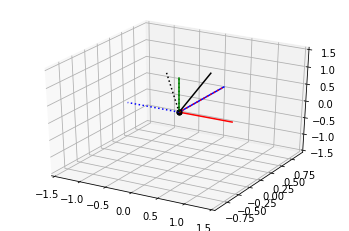

In [70]:
'''
Using a rotation matrix to rotate a vector in 3D
'''
ax = plt.axes(projection='3d')
ax.axis('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

def plot3DFrame(origin, frame, colors=['r', 'b', 'g'], linestyle='-'):
    ax.plot([origin[0]], [origin[1]], [origin[2]], marker='o',
            markersize=5, color='k')
    for col in range(frame.shape[1]):
        plot3DVector(origin, frame[:, col], color=colors[col],
                     linestyle=linestyle)

def plot3DVector(origin, vector, color='k', linestyle='-'):
    ax.plot([origin[0], vector[0]], [origin[1], vector[1]],
            [origin[2], vector[2]], color=color, linestyle=linestyle)

# initial frame
origin = np.array([0, 0, 0])
F = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# rotation matrix (new frame)
R = np.array([[0, -1, 0],
              [1, 0, 0],
              [0, 0, 1]])

v = np.array([1, 2, 4])
v = v / np.linalg.norm(v)

r = np.dot(R, np.transpose(v))

plot3DFrame(origin, F)
plot3DVector(origin, v)

plot3DFrame(origin, R, linestyle=':')
plot3DVector(origin, r, linestyle=':')

plt.show()

### Rotations

Rotate by $\theta$ about rotation axis $\hat{\omega}$: See pg. 74 for $Rot(\hat{\omega}, \theta)$.  
Given arbitraty rotation matrix, $R$:
$$
\begin{align*}
    &RR_{sb} &\text{rotate by $R$ in $s$ frame; $\hat{\omega}$ in $s$} \\
    &R_{sb}R &\text{rotate by $R$ in $b$ frame; $\hat{\omega}$ in $b$}
\end{align*}
$$

### Angular Velocities

![Figure 3.10](images/fig3.10.png)

$$
\begin{align*}
    \omega &= \dot{\theta}\hat{\omega} &\text{angular velocity}\\
    \dot{\hat{x}} &= \omega \times \hat{x} \\
    \dot{\hat{y}} &= \omega \times \hat{y} \\
    \dot{\hat{z}} &= \omega \times \hat{z}
\end{align*}
$$

$R$ is rotation matrix describing the orientation of the body frame, $b$, in the fixed frame, $s$, ($R = R_{sb}$). $R$'s basis vectors are $\{r_x, r_y, r_z\}$.

$$
\begin{align*}
    \dot{r_i} &= \omega_s \times r_i &i = x, y, z \\
    \dot{R} &= \begin{bmatrix}
        \omega_s \times r_x & \omega_s \times r_y & \omega_s \times r_z
    \end{bmatrix}
\end{align*}
$$

$3 \times 3$ skew-symmetric matrices can be used to represent cross products as matrix multiplications: $a \times b = [a]b$, where $a$ and $b$ are vectors.  

Note: Set of all $3 \times 3$ real skew-symmetric matricies is $so(3)$, Lie algebra of Lie group $SO(3)$. [https://en.wikipedia.org/wiki/3D_rotation_group#Lie_algebra]

$$
\begin{align*}
    a &= \begin{bmatrix}
        a_1 \\
        a_2 \\
        a_3
    \end{bmatrix} \\
    [a] &= \begin{bmatrix}
        0 & -a_3 & a_2 \\
        a_3 & 0 & -a_1 \\
        -a_2 & a_1 & 0
    \end{bmatrix} \\
    [a] &= -[a]^{\top}
\end{align*}
$$

Given any $w \in \mathbb{R}^3$ and $R \in SO(3)$: $R[\omega]R^{\top} = [R\omega]$

$$
\begin{align*}
    \dot{R} &= [\omega_s]R \\
    [\omega_s] &= \dot{R}R^{-1} \\
\end{align*}
$$

$$
\begin{align*}
    \omega_b &= R_{sb}^{-1}\omega_s \\
    &= R^{\top}\omega_s \\
    [\omega_b] &= [R^{\top}\omega_s] \\
    &= R^{\top}[\omega_s]R \\
    &= R^{\top}(\dot{R}R^{\top})R \\
    &= R^{\top}\dot{R} = R^{-1}\dot{R}
\end{align*}
$$

Important: $\omega_b$ is the angular velocity relative to the _stationary_ frame, $b$, that is instantaneously coincident with a frame attached to the moving body. $\omega_s$ does not depend on the body frame and $\omega_b$ does not depend on the fixed frame.

### Exponential Coordinates of Rotation

Axis-angle representation: $(\hat{\omega}, \theta)$  
Exponential coordinate representation: rotation matrix, $R$, such that it would represent the orientation of a frame initially coincident with the fixed frame, $s$,
- rotated by $\theta$ about $\hat{\omega}$
- rotated at an angular velocity of $\theta\hat{\omega}$ for one unit of time
- rotated at an angular velocity of $\hat{\omega}$ for $\theta$ units of time

Recall:
- Differential equations: $\dot{x}(t) = ax(t) \implies x(t) = e^{at}x_0$
- Taylor series expansion:
    - $e^{at} = 1 + at + \frac{(at)^2}{2!} + \frac{(at)^3}{3!} + \dots$
    - $\sin{\theta} = \theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \dots$
    - $\cos{\theta} = 1 - \frac{\theta^2}{2!} + \frac{\theta^4}{4!} - \dots$
- Vector form: $\dot{x}(t) = Ax(t) \implies x(t) = e^{At}x_0$; $e^{At} = I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots$
- Note: $Ae^{At} = e^{At}A$
- If $A = PD^{-1}P$, $e^{At} = Pe^{Dt}P^{-1}$

Given a vector, $p$, rotating at angular velocity, $\hat{\omega} = 1 \ rad/s$ from time $t = 0$ to $t = \theta$:

$$
\begin{align*}
    \dot{p} &= \hat{\omega} \times p \\
    &= [\hat{\omega}]p \\
    p(\theta) &= e^{[\hat{\omega}]\theta}p(0) \\
    e^{[\hat{\omega}]\theta} &= I + [\hat{\omega}]\theta + [\hat{\omega}]^2\frac{\theta^2}{2!} + [\hat{\omega}]^3\frac{\theta^3}{3!} + \dots \\
    &= I + (\theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \dots)[\hat{\omega}] + (\frac{\theta^2}{2!} - \frac{\theta^4}{4!} + \frac{\theta^6}{6!} - \dots)[\hat{\omega}]^2 \\
    &= I + \sin{\theta}[\hat{\omega}] + (1 - \cos{\theta})[\hat{\omega}]^2 \\
    p(\theta) &= Rp(0) \ \text{where} \ R = e^{[\hat{\omega}]\theta}
\end{align*}
$$

$$R = e^{[\hat{\omega}]\theta}$$

### Matrix Logarithm

exp: $[\hat{\omega}]\theta \in so(3) \to R \in SO(3)$  
log: $R \in SO(3) \to [\hat{\omega}]\theta \in so(3)$

Matrix logarithm algorithm:
Given $R \in SO(3)$, find an angle $\theta \in [0, \pi]$ and unit rotation axis $\hat{\omega} \in \mathbb{R}^3$ such that $R = e^{[\hat{\omega}]\theta}$.  

- If $R = I$, $\theta = 0$ and $\hat{\omega}$ is undefined.
- If $\tr{R} = -1$, $\theta = \pi$ and $\hat{\omega} = \frac{1}{\sqrt{2(1 + r_{33})}}
\begin{bmatrix}
    r_{13} \\
    r_{23} \\
    1 + r_{33}
\end{bmatrix}
$ or $\frac{1}{\sqrt{2(1 + r_{22})}}
\begin{bmatrix}
    r_{12} \\
    1 + r_{22} \\
    r_{32}
\end{bmatrix}
$ or $\frac{1}{\sqrt{2(1 + r_{11})}}
\begin{bmatrix}
    1 + r_{11} \\
    r_{21} \\
    r_{31}
\end{bmatrix}
$
- Otherwise, $\theta = \cos^{-1}(\frac{1}{2}(\tr{R} - 1))$ and $[\hat{\omega}] = \frac{1}{2\sin{\theta}}(R - R^{\top})$

## Rigid-Body Motions and Twists

Transformation matrix:  
Given rotation matrix, $R$, and vector to origin, $p$, and assuming 3 dimensions:  
$$T =
\begin{bmatrix}
    R & p \\
    0 & 1
\end{bmatrix} =
\begin{bmatrix}
    r_{11} & r_{12} & r_{13} & p_1 \\
    r_{21} & r_{22} & r_{23} & p_2 \\
    r_{31} & r_{32} & r_{33} & p_3 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}
$$  
$T \in SE(n)$ the special Euclidean group, group of rigid-body motions, or homogeneous transformation matrices in $\mathbb{R}^n$.

Transformation matrix properties:
- Closure: $T_1 T_2 \in SE(n)$
- Associativity: $(T_1 T_2) T_3 = T_1 (T_2 T_3)$
- Identity element existance: $I \in SE(n)$
- Inverse element existance: $T^{-1} \in SE(n)$ where $T^{-1} = 
\begin{bmatrix}
    R & p \\
    0 & 1
\end{bmatrix}^{-1} = 
\begin{bmatrix}
    R^{\top} & -R^{\top}p \\
    0 & 1
\end{bmatrix}
$
- Transformation matrices preserve distances and angles: $\Vert Tx - Ty \Vert = \Vert x - y \Vert$ and $\langle Tx - Tz, Ty - Tz \rangle = \langle x - z, y - z \rangle$

Note: $Tx$ is used to denote $T
\begin{bmatrix}
    x \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    R & p \\
    0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\
    1
\end{bmatrix} = 
\begin{bmatrix}
    Rx + p \\
    1
\end{bmatrix}
$ where $Rx + p$ is the rotation and displacement of x.

Uses of transformation matrices:
1. To represent position and orientation
2. To change reference frame in which a vector or frame is represented
3. To displace a vector or frame

Changing frames:
$$
\begin{align*}
    T_{ab} &= T_{ba}^{-1} \\
    T_{ab} T_{bc} &= T_{ac} \\
    T_{ab} v_b &= v_a
\end{align*}
$$

Given an arbitrary transformation matrix, $T = (R, p)$:
$$
\begin{align*}
    T T_{sb} &=
    \begin{bmatrix}
        RR_{sb} & Rp_{sb} + p \\
        0 & 1
    \end{bmatrix}
    &\text{rotate then translate; $\hat{\omega}$ and $p$ are in $s$} \\
    T_{sb} T &= 
    \begin{bmatrix}
        R_{sb}R & R_{sb}p + p_{sb} \\
        0 & 1
    \end{bmatrix}
    &\text{translate then rotate; $\hat{\omega}$ and $p$ are in $b$}
\end{align*}
$$

![Figure 3.15](images/fig3.15.png)

### Twists